# Optimization and Algorithms Project - Task 1

## Group Members
*David Marafuz Gaspar* | 106541  
*Pedro Gaspar Mónico* | 106626  
*Francisco Palma* | 105949  
*Pedro Salazar Leite* | 106812  

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time

In [ ]:
# Load Data
target = np.load('Data/target_1.npy') # (2, 60)

In [ ]:
target = target.T # (60, 2)  ->  ( x_k , y_k )

print(target)

In [3]:
T = 60
weights = [10,5,2,1,0.5,0.2,0.1,0.05,0.02,0.01,0.005,0.002]

A = np.array([[1,0,0.1,0],
              [0,1,0,0.1],
              [0,0,0.8,0],
              [0,0,0,0.8]])

B = np.array([[0,0],
              [0,0],
              [0.1,0],
              [0,0.1]])

E = np.array([[1,0,0,0],
              [0,1,0,0]])

x1 = np.array([0.5,0,1,-1])   # initial state

In [4]:
TE_vals, CE_vals, x_i = [], [], []

start = time.time()

for i, weight in enumerate(weights):
    x = cp.Variable((T, 4))
    u = cp.Variable((T-1, 2))

    constr = [x[0, :] == x1]

    for t in range(T-1):
        constr += [x[t+1, :] == A @ x[t, :] + B @ u[t, :]]

    TE = cp.sum([cp.norm(E @ x[t, :].T - target[t, :].T, 2) for t in range(T)])
    CE = cp.norm(u, "fro")**2 

    obj = cp.Minimize(TE + weight * CE)

    prob = cp.Problem(obj, constr)

    prob.solve()
    print(f"ρ={weight}, TE={TE.value}, CE={CE.value}")

    TE_vals.append(TE.value)
    CE_vals.append(CE.value)
    x_i.append(x.value)

end = time.time()
print(f"solve time={end-start:.3f} sec")

ρ=10, TE=88.84015707515188, CE=0.27526655242423703
ρ=5, TE=83.55639373799376, CE=1.0654322257382873
ρ=2, TE=69.84157113280827, CE=5.77480273813007
ρ=1, TE=55.747126855684286, CE=15.914727981636961
ρ=0.5, TE=43.399404289627775, CE=33.67934416348734
ρ=0.2, TE=23.73137102570951, CE=99.6486975454243
ρ=0.1, TE=12.004009224456828, CE=179.37613964111992
ρ=0.05, TE=9.243767055168897, CE=216.85520449723535
ρ=0.02, TE=6.45187105009717, CE=310.12993245931597
ρ=0.01, TE=4.534489033539718, CE=441.7984508359826
ρ=0.005, TE=3.4442503618008153, CE=594.6549305013608
ρ=0.002, TE=2.5981821479514213, CE=860.2566801931746
solve time=1.563 sec


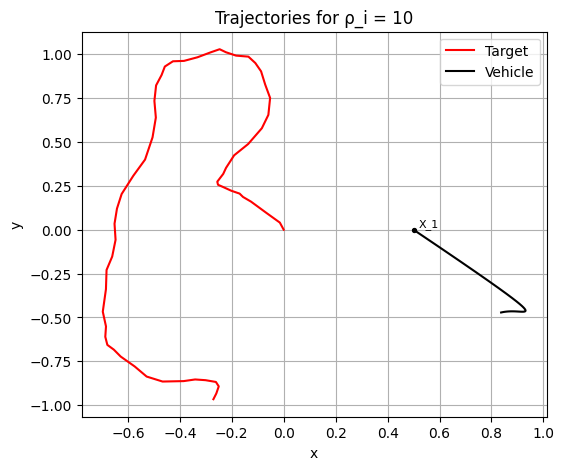

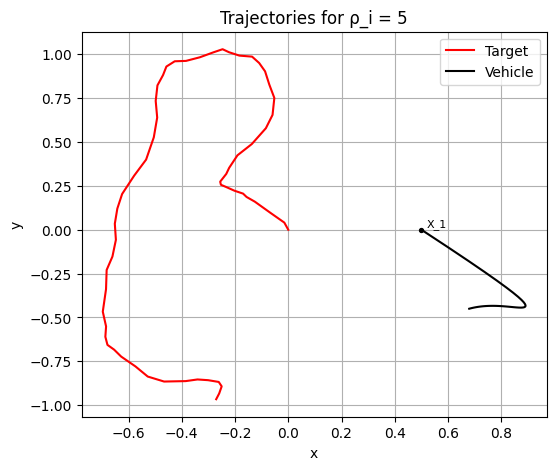

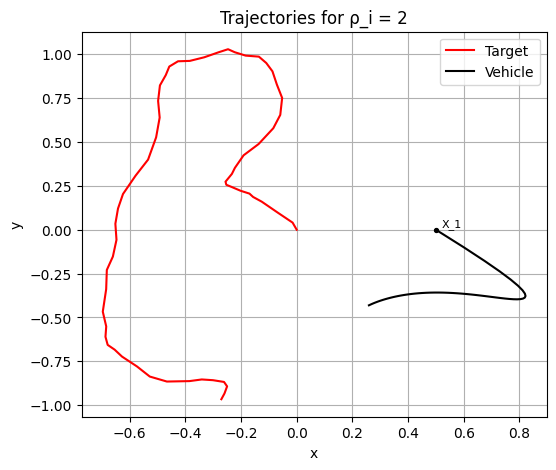

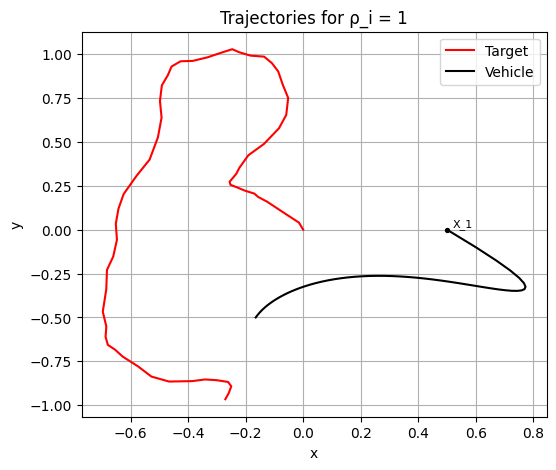

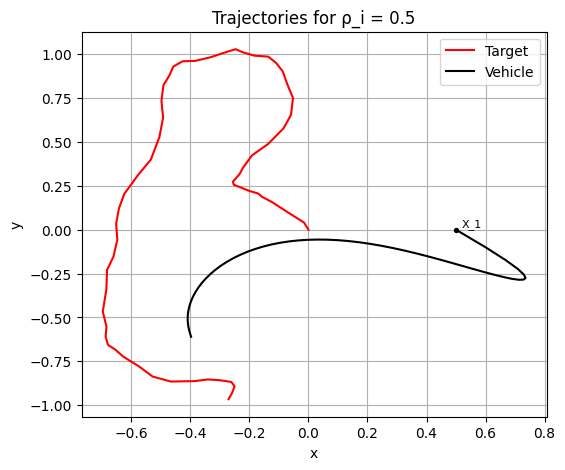

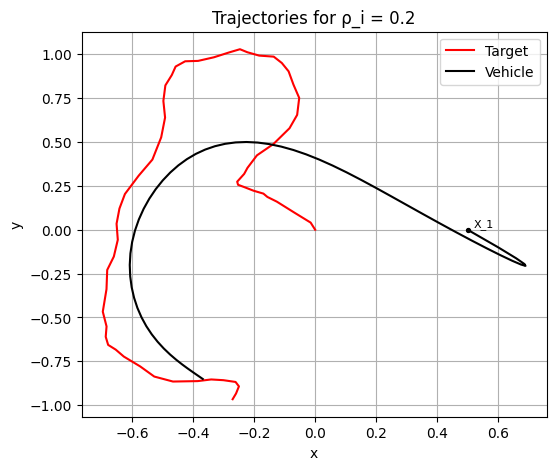

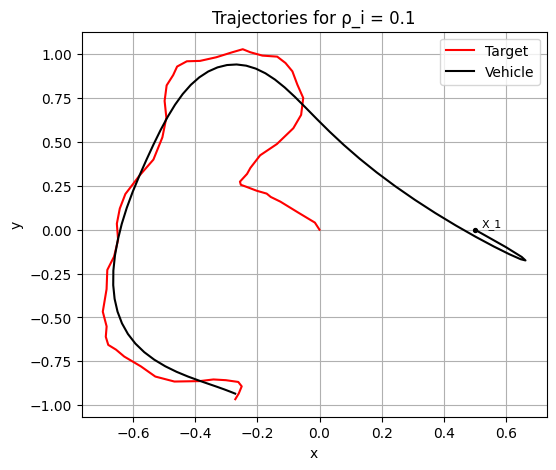

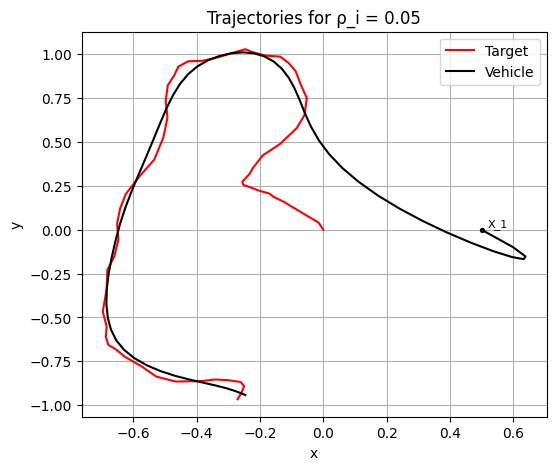

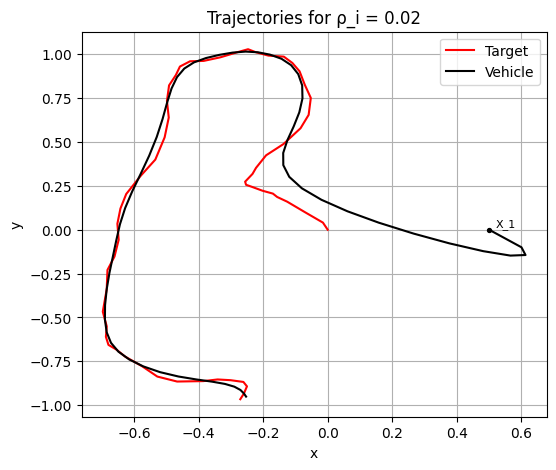

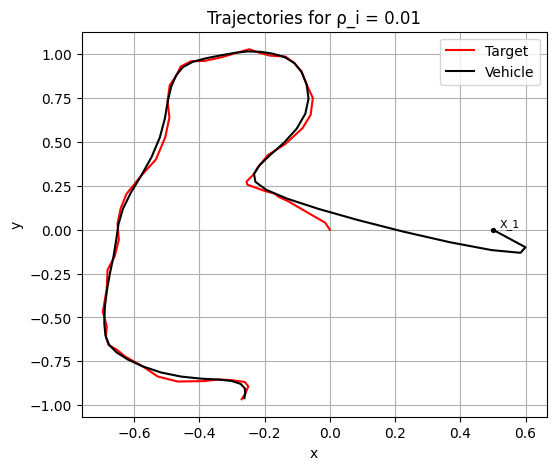

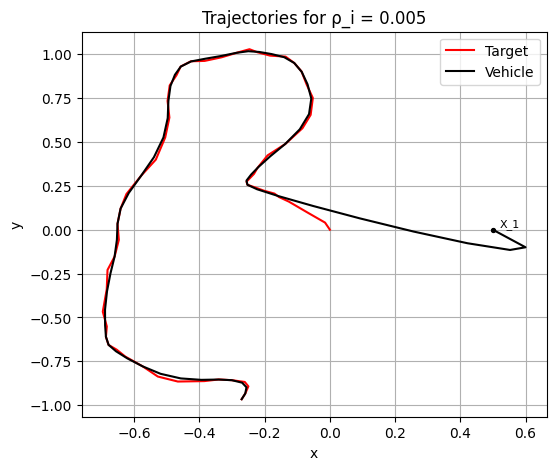

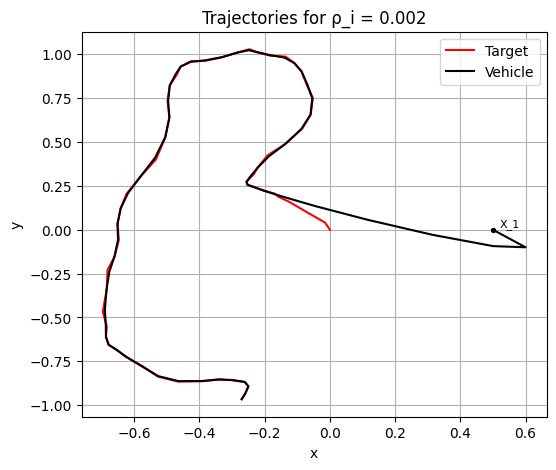

In [5]:
for i, weight in enumerate(weights):

    plt.figure(figsize=(6,5))

    plt.plot(target[:,0], target[:,1], 'r-', label="Target")       
    plt.plot(x_i[i][:, 0], x_i[i][:, 1], 'k-', label="Vehicle")  

    plt.scatter(x_i[0][0,0], x_i[0][0, 1], color='black', s=8, zorder=5)  
    plt.text(x_i[0][0,0] + 0.02, x_i[0][0, 1] + 0.02, "X_1", color='black', fontsize=8)   

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Trajectories for ρ_i = {weight}")
    plt.legend()
    plt.grid(True)
    plt.show()  


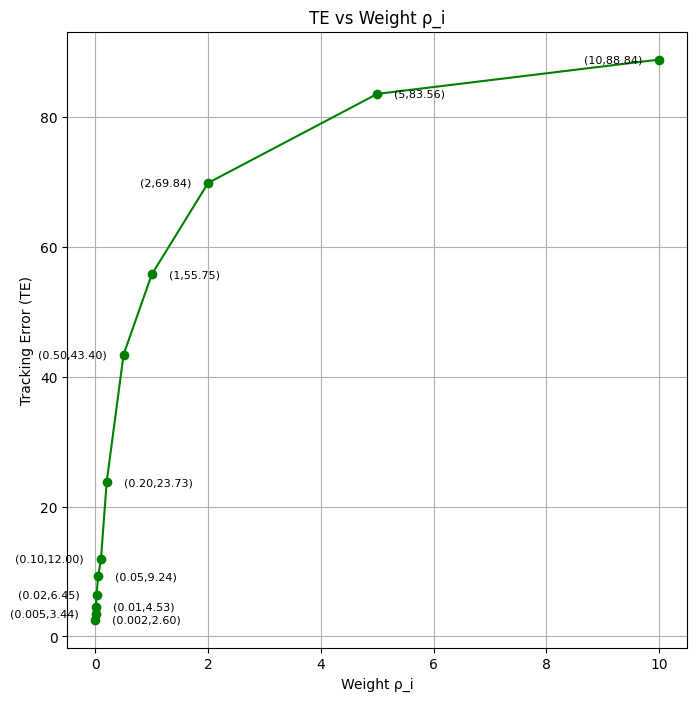

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(weights, TE_vals, 'o-', color='green', markersize=6)

x_range = max(weights) - min(weights)
offset = 0.03 * x_range  

for i, (x, y) in enumerate(zip(weights, TE_vals)):
    if x >= 0.01:
        x_text = f'{x:.2f}' if not float(x).is_integer() else f'{int(x)}'
    else:
        x_text = f'{x}'
        
    if y >= 0.01:
        y_text = f'{y:.2f}' if not float(y).is_integer() else f'{int(y)}'
    else:
        y_text = f'{y}'
    
    ha = 'right' if i % 2 == 0 else 'left'
    x_pos = x - offset if ha == 'right' else x + offset
    plt.text(x_pos, y, f'({x_text},{y_text})', fontsize=8, ha=ha, va='center')

plt.xlabel("Weight ρ_i")
plt.ylabel("Tracking Error (TE)")
plt.title("TE vs Weight ρ_i")
plt.grid(True)
plt.show()


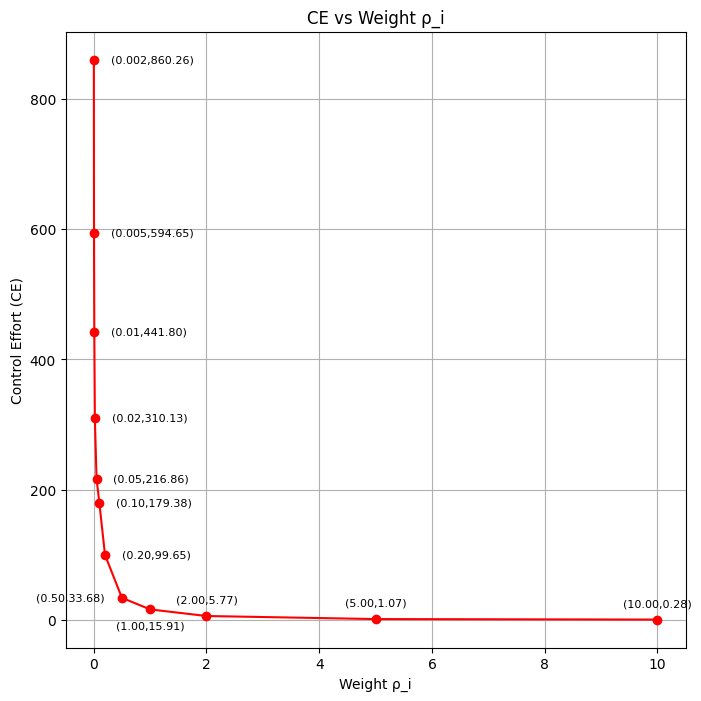

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(weights, CE_vals, 'o-', color='red', markersize=6)

x_range = max(weights) - min(weights)
y_range = max(CE_vals) - min(CE_vals)
offset_x = 0.03 * x_range 
offset_y = 0.02 * y_range  

for x, y in zip(weights, CE_vals):
    x_text = f'{x:.2f}' if x >= 0.01 else f'{x}'
    y_text = f'{y:.2f}' if y >= 0.01 else f'{y}'
    
    if x < 0.5:
        ha = 'left'
        va = 'center'
        x_pos = x + offset_x
        y_pos = y
    elif x == 0.5:
        ha = 'right'
        va = 'center'
        x_pos = x - offset_x
        y_pos = y
    elif x == 1:
        ha = 'center'
        va = 'top'
        x_pos = x
        y_pos = y - offset_y
    elif x in [2, 5, 10]:
        ha = 'center'
        va = 'bottom'
        x_pos = x
        y_pos = y + offset_y
    else:
        # valores intermediários podem ir à direita por padrão
        ha = 'left'
        va = 'center'
        x_pos = x + offset_x
        y_pos = y

    plt.text(x_pos, y_pos, f'({x_text},{y_text})', fontsize=8, ha=ha, va=va)

plt.xlabel("Weight ρ_i")
plt.ylabel("Control Effort (CE)")
plt.title("CE vs Weight ρ_i")
plt.grid(True)
plt.show()


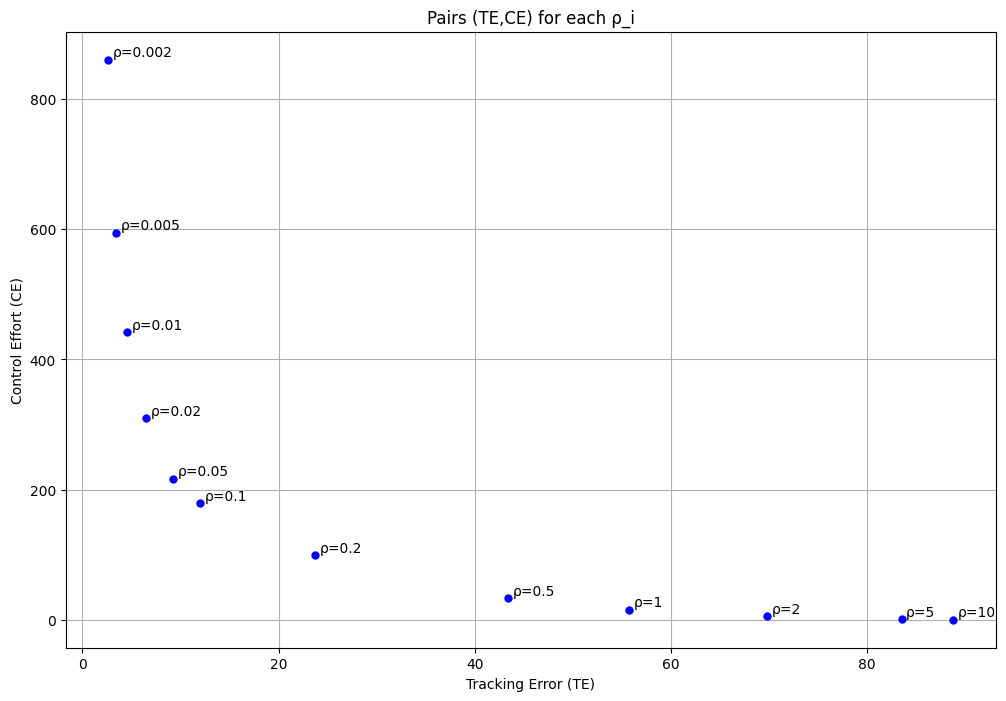

In [8]:
plt.figure(figsize=(12,8))
plt.plot(TE_vals, CE_vals, 'o', color='blue', markersize=5)

x_range = max(TE_vals) - min(TE_vals)
offset_x = 0.0055* x_range 

for i, (te, ce) in enumerate(zip(TE_vals, CE_vals)):
    plt.text(te + offset_x, ce, f'ρ={weights[i]}', fontsize=10, ha='left', va='bottom')  

plt.xlabel("Tracking Error (TE)")
plt.ylabel("Control Effort (CE)")
plt.title("Pairs (TE,CE) for each ρ_i")
plt.grid(True)
plt.show()
